In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("website_traffic.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Page Views        2000 non-null   int64  
 1   Session Duration  2000 non-null   float64
 2   Bounce Rate       2000 non-null   float64
 3   Traffic Source    2000 non-null   object 
 4   Time on Page      2000 non-null   float64
 5   Previous Visits   2000 non-null   int64  
 6   Conversion Rate   2000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 109.5+ KB


In [2]:
data.columns

Index(['Page Views', 'Session Duration', 'Bounce Rate', 'Traffic Source',
       'Time on Page', 'Previous Visits', 'Conversion Rate'],
      dtype='object')

In [3]:
data

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0
...,...,...,...,...,...,...,...
1995,1,2.724513,0.207187,Referral,1.324206,2,1.0
1996,3,0.392856,0.095559,Organic,3.824416,1,1.0
1997,4,9.899823,0.446622,Organic,1.288675,1,1.0
1998,3,0.393319,0.278340,Paid,5.037584,2,1.0


In [4]:
new_data = data.drop('Traffic Source', axis=1)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Page Views        2000 non-null   int64  
 1   Session Duration  2000 non-null   float64
 2   Bounce Rate       2000 non-null   float64
 3   Time on Page      2000 non-null   float64
 4   Previous Visits   2000 non-null   int64  
 5   Conversion Rate   2000 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 93.9 KB


In [5]:
data.describe()

,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,4.950500,3.022045,0.284767,4.027439,1.978500,0.982065
std,2.183903,3.104518,0.159781,2.887422,1.432852,0.065680
min,0.000000,0.003613,0.007868,0.068515,0.000000,0.343665
25%,3.000000,0.815828,0.161986,1.935037,1.000000,1.000000
50%,5.000000,1.993983,0.266375,3.315316,2.000000,1.000000
75%,6.000000,4.197569,0.388551,5.414627,3.000000,1.000000
max,14.000000,20.290516,0.844939,24.796182,9.000000,1.000000


In [6]:
data.corr(numeric_only=True)

,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate
Page Views,1.000000,-0.012788,0.030223,0.023941,0.028595,0.126635
Session Duration,-0.012788,1.000000,-0.015931,-0.013985,-0.025534,0.177798
Bounce Rate,0.030223,-0.015931,1.000000,0.039340,-0.015860,-0.049051
Time on Page,0.023941,-0.013985,0.039340,1.000000,-0.028729,0.229669
Previous Visits,0.028595,-0.025534,-0.015860,-0.028729,1.000000,0.109496
Conversion Rate,0.126635,0.177798,-0.049051,0.229669,0.109496,1.000000


In [7]:
# Calculate Correlations
# Determine the correlation coefficients between the Conversion Rate column and 
# all other numerical columns in the dataset.

correlation_matrix = data.corr(numeric_only=True)
conversion_rate_correlation = correlation_matrix["Conversion Rate"]
conversion_rate_correlation

Page Views          0.126635
Session Duration    0.177798
Bounce Rate        -0.049051
Time on Page        0.229669
Previous Visits     0.109496
Conversion Rate     1.000000
Name: Conversion Rate, dtype: float64

In [8]:
# Positive Correlations: Columns like PageViews, SessionDuration, TimeOnPage and Previous Visits
# have positive correlation coefficients with ConversionRate, 
# indicating that as these variables increase, the conversion rate tends to increase as well.

# Negative Correlations: A column like BounceRate has a negative correlation with ConversionRate, 
# suggesting that as the bounce rate increases, the conversion rate tends to decrease.

In [9]:
# Feature Selection
# Choose features with a positive correlation as potential predictors for Conversion Rate.
# potential predictors are: Time on Page, Session Duration, Page Views, Previous Visits

# Filter features with positive correlation values
positive_correlations = conversion_rate_correlation[conversion_rate_correlation > 0]
selected_features = positive_correlations.index.drop("Conversion Rate")
selected_features


Index(['Page Views', 'Session Duration', 'Time on Page', 'Previous Visits'], dtype='object')

In [10]:
y = data["Conversion Rate"]
X = data[selected_features]

y.head()
X.head()


,Page Views,Session Duration,Time on Page,Previous Visits
0,5,11.051381,3.890460,3
1,4,3.429316,8.478174,0
2,4,1.621052,9.636170,2
3,5,3.629279,2.071925,3
4,5,4.235843,1.960654,5


In [11]:
# Data Splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 1600 samples
Testing set size: 400 samples


In [12]:
# Calculate MAE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")



Mean Absolute Error (MAE): 0.031691679454021
Mean Absolute Error (MAE): 0.0317


In [13]:
# A lower MAE indicates that model's predictions are close to the actual values, 
# implying better predictive accuracy. 
# Conversely, a higher MAE suggests less accurate predictions.

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

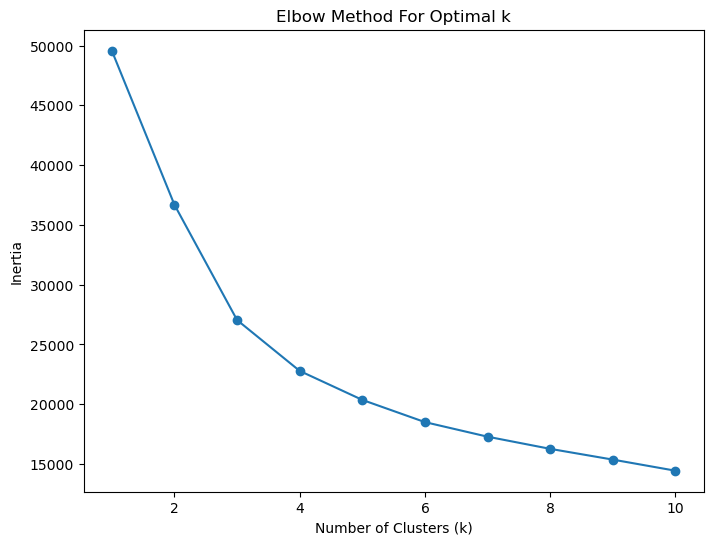

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow Method
# Initialize an empty list to store the inertia values
inertia = []

# Set the range for k (number of clusters)
k_range = range(1, 11)

# Fit K-Means for each k and calculate the inertia
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)  
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


In [21]:
from sklearn.cluster import KMeans

# Initialize the KMeans model with the optimal number of clusters (k)
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the model and predict cluster labels for each row in the data
cluster_labels = kmeans.fit_predict(X)

# Add the cluster labels to the original dataframe
new_data['Cluster'] = cluster_labels
new_data




C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate,Cluster
0,5,11.051381,0.230652,3.890460,3,1.0,2
1,4,3.429316,0.391001,8.478174,0,1.0,3
2,4,1.621052,0.397986,9.636170,2,1.0,3
3,5,3.629279,0.180458,2.071925,3,1.0,1
4,5,4.235843,0.291541,1.960654,5,1.0,1
...,...,...,...,...,...,...,...
1995,1,2.724513,0.207187,1.324206,2,1.0,1
1996,3,0.392856,0.095559,3.824416,1,1.0,1
1997,4,9.899823,0.446622,1.288675,1,1.0,2
1998,3,0.393319,0.278340,5.037584,2,1.0,1


In [24]:
# Group the data by the 'Cluster' column
cluster_means = new_data.groupby('Cluster').mean()
cluster_means


,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate
Cluster,,,,,,
0,7.313208,1.994288,0.285758,2.959120,2.098113,0.987949
1,3.531060,1.944717,0.282543,2.813290,1.943971,0.964089
2,4.759717,9.083344,0.280872,3.463099,1.872792,1.000000
3,4.860656,2.240212,0.291331,8.734362,1.964481,1.000000


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


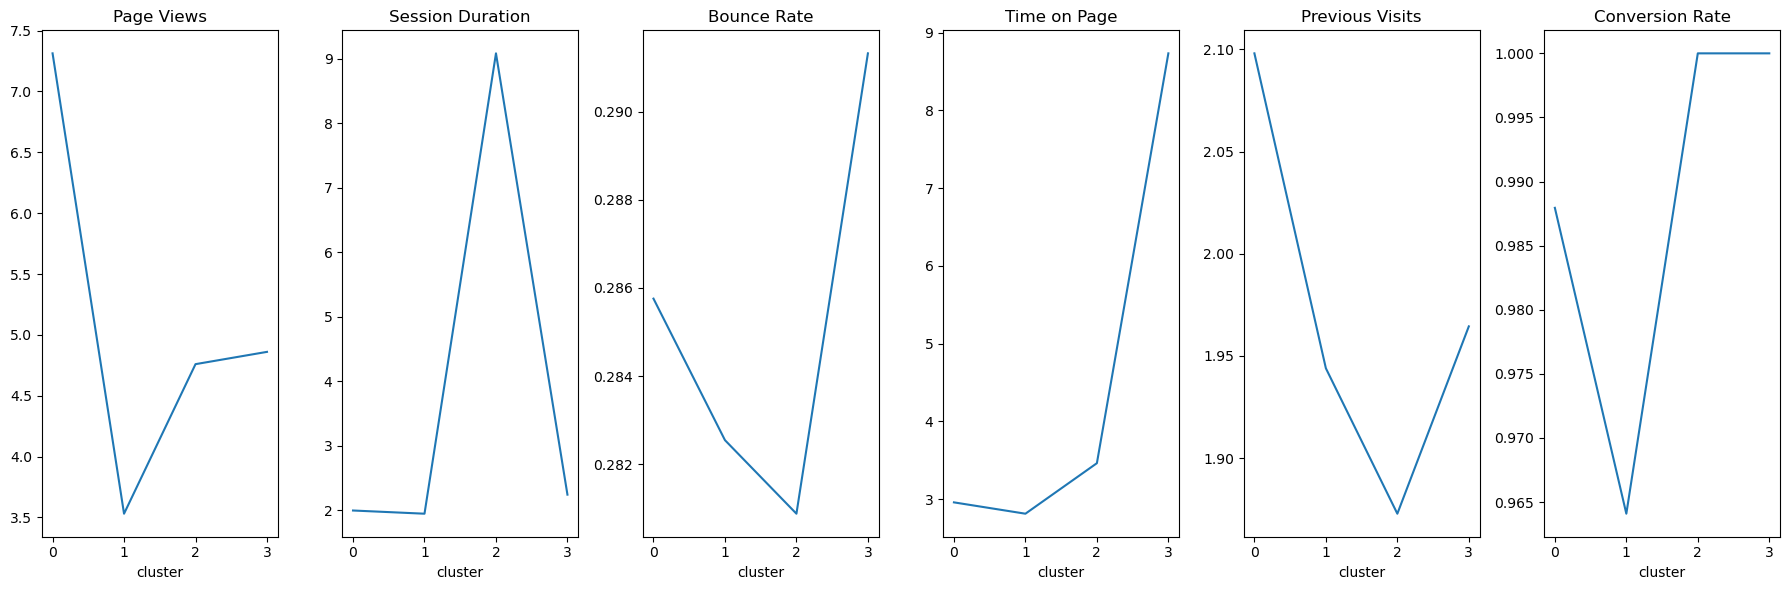

In [25]:
# Cluster Visualisation

# Selecting features for clustering (excluding 'Traffic Source' as it's categorical)
features = data[['Page Views', 'Session Duration', 'Bounce Rate', 'Time on Page', 'Previous Visits', 'Conversion Rate']]

# Applying KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(features)

# Adding cluster labels to the dataset
data['cluster'] = clusters

# Visualizing the distribution of features within each cluster
fig, axes = plt.subplots(1, 6, figsize=(18, 6))

# Feature names for visualization
feature_names = ['Page Views', 'Session Duration', 'Bounce Rate', 'Time on Page', 'Previous Visits', 'Conversion Rate']

# Plotting each feature
for i, ax in enumerate(axes):
    data.groupby('cluster')[feature_names[i]].mean().plot(ax=ax)
    ax.set_title(feature_names[i])
    ax.set_xlabel('cluster')

plt.tight_layout()
plt.show()



In [ ]:
# Analyzing the results:

# Page Views
# Cluster 0 has the highest Page Views, indicating strong interest in content.
# Cluster 1 has the lowest Page Views, potentially due to content not resonating with this group.

# Session Duration
# Cluster 2 shows the longest Session Duration, which correlates with higher Conversion Rates.
# Cluster 1's shorter Session Duration suggests a lack of interest or poor content relevance.

# Bounce Rate
# Cluster 2 has the lowest Bounce Rate, suggesting effective landing pages.
# Cluster 3's high Bounce Rate may be due to issues with content or site performance.

# Time on Page
# Cluster 3 leads with high Time on Page, suggesting deep content engagement.
# Cluster 1's lower Time on Page indicates users are not as engaged.

# Previous Visits: 
# Cluster 0 has the most previous visits on average, 
# indicating a higher frequency of returning users.
# While cluster 2 has the fewest and the lowest number of previous visits 
# suggests these might be new or infrequent users.

# Conversion Rate
# Cluster 2 shows the highest Conversion Rate, making it the most valuable cluster.
# Despite high Page Views, Cluster 1 has a lower Conversion Rate, indicating a need for more targeted content.
